# Random Forests

## 載入套件

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline

preprocess_status = '_mean' # read csv file name and save model file name

## read train dataset

In [175]:
df_tr = pd.read_excel("./preprocess/output_tr" + preprocess_status + ".xlsx", engine='openpyxl')
# df = pd.read_csv("final/tr.csv")
df_tr.head(3)

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder,outcome
0,59,1,8.0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,69,0,5.0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,80,0,8.0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


## read test dataset

In [ ]:
df_ts = pd.read_excel("ts.xlsx", engine='openpyxl')
# df = pd.read_csv("final/ts.csv")
df_ts.head(3)

## 將資料分成訓練組及測試組

In [176]:
df_tr_shuffle = shuffle(df_tr)
df_tr_shuffle

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder,outcome
74500,61,1,6.00,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
53930,44,0,6.89,1,1,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,1
30800,71,1,4.00,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
71416,74,0,7.75,0,1,1,0,1,3,2,...,0,0,0,0,0,0,0,0,0,1
31972,80,1,7.00,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42208,51,0,3.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48631,67,1,4.00,0,0,1,0,1,9,4,...,0,0,0,0,0,0,0,0,0,0
89944,76,0,4.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6436,67,1,3.00,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
X = df_tr_shuffle.drop('outcome', 1)
y = df_tr_shuffle['outcome']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(77230, 66)
(77230,)
(19308, 66)
(19308,)


## DT 決策樹

In [166]:
#使用決策樹演算法
dtree = DecisionTreeClassifier(splitter='best', criterion='entropy', max_features='auto', min_samples_split=6)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=6)

In [167]:
#評估決策樹模型好壞
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9691
           1       0.95      0.96      0.95      9601

    accuracy                           0.95     19292
   macro avg       0.95      0.95      0.95     19292
weighted avg       0.95      0.95      0.95     19292



In [171]:
# save
import joblib
joblib.dump(dtree, "./model/c4.5/c4.5" + preprocess_status + ".joblib")

['./model/c4.5/c4.5_best__mode_over.joblib']

## RF 隨機森林

In [47]:
# define model
#weights = {0:1.0, 1:55.0}
#rfc = RandomForestClassifier(n_estimators=100, class_weight=weights)

In [243]:
#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100, criterion='gini')

In [244]:
#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)

#預測測試組的駝背是否發生
predictions = rfc.predict(X_test)

# 檢驗模型的正確率
rfc.score(X_test,y_test)

0.9819763828464885

In [49]:
# save
import joblib
joblib.dump(rfc, "./model/rf/random_forest" + preprocess_status + ".joblib")

['./model/rf/random_forest_unbalance.joblib']

## 視覺化 subtree

In [ ]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(estimator, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

In [ ]:
dot_data = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=list(X.columns),  
                     class_names=list(y.to_frame().columns),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Evaluate

In [245]:
#利用confusion matrix來看實際及預測的差異
confu_matrix = confusion_matrix(y_test,predictions)
print(confu_matrix)

[[9408  190]
 [ 158 9552]]


In [246]:
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9598
           1       0.98      0.98      0.98      9710

    accuracy                           0.98     19308
   macro avg       0.98      0.98      0.98     19308
weighted avg       0.98      0.98      0.98     19308



In [247]:
import math


#      |  (a)  |  (b)  |
# --------------------------
# (a)  |  TP   |  FN   |
# --------------------------
# (b)  |  FP   |  TN   |

tp = confu_matrix[0, 0]
fp = confu_matrix[0, 1]
fn = confu_matrix[1, 0]
tn = confu_matrix[1, 1]

acc = (tp + tn) / (tp + fp + tn + fn)
f1 = (2 * tp) / (2 * tp + fp + fn)
ppv = (tp) / (tp + fp)
recall = (tp) / (tp + fn)
mcc = ((tp * tn) - (fp * fn)) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))

tpr = tp / (tp + fn)
fpr = fp / (fp + tn) 
auc = 1/2 - fpr/2 + tpr/2


print('acc: ', acc)
print('f1: ', f1)
print('ppv: ', ppv)
print('recall: ', recall)
print('mcc: ', mcc)
print('auc: ', auc)

acc:  0.9819763828464885
f1:  0.9818409517845961
ppv:  0.9802042092102521
recall:  0.9834831695588543
mcc:  0.9639561557134028
auc:  0.9819899937303612


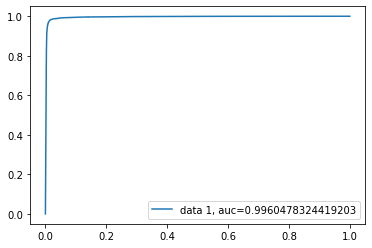

In [248]:
from sklearn import metrics
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 視覺化

<AxesSubplot:>

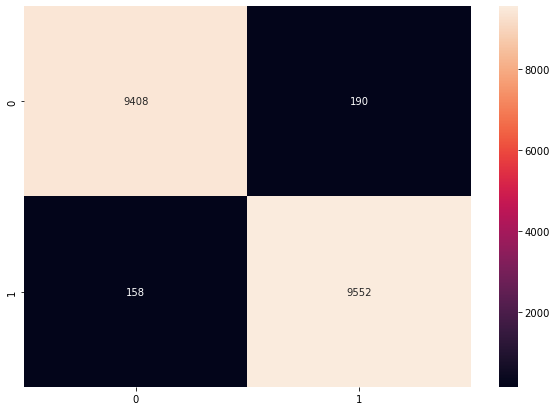

In [249]:
import seaborn as sn
df_cm = pd.DataFrame(confu_matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt = ".20g", annot=True)

In [13]:
imp=rfc.feature_importances_
imp

array([9.96511315e-02, 6.03473972e-02, 1.70336396e-01, 3.12528605e-02,
       1.13665971e-02, 1.52095190e-02, 2.10878185e-02, 1.61437319e-02,
       2.09054219e-02, 2.21869647e-02, 1.57842328e-02, 7.59897873e-02,
       3.12879102e-02, 1.16281787e-02, 6.92961747e-03, 3.21949018e-02,
       3.74225416e-02, 1.28774515e-02, 1.07385979e-02, 7.86100896e-03,
       2.02330958e-02, 1.13380886e-02, 2.35611238e-03, 2.06954017e-02,
       2.90314446e-02, 2.29108156e-02, 1.76937602e-02, 1.63745489e-02,
       1.40591060e-02, 1.79030672e-02, 1.37327262e-02, 1.60352771e-02,
       1.64150474e-03, 4.76895522e-03, 1.75943155e-03, 3.93743545e-03,
       7.20723324e-05, 5.41111598e-04, 1.69252780e-02, 3.07226307e-04,
       2.07281028e-03, 5.18412092e-03, 3.85337390e-03, 7.95774445e-03,
       9.94083487e-04, 2.77149972e-03, 7.17009466e-03, 6.41632433e-03,
       2.08655604e-05, 6.30089448e-05, 1.30761652e-04, 3.07696224e-03,
       2.86985969e-03, 4.48206575e-03, 6.45114797e-04, 1.40153081e-03,
      

## 方法的比較

In [ ]:
#random forest test
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
X, y = make_blobs(n_samples=10000, n_features=10, centers=100,random_state=0)
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())    
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())    
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())

In [ ]:
#隨機森林2
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np 
from sklearn.datasets import load_iris 
iris=load_iris() 
from sklearn.model_selection import cross_val_score, ShuffleSplit 
X = iris["data"] 
Y = iris["target"] 
names = iris["feature_names"] 
rf = RandomForestRegressor() 
scores = [] 
for i in range(X.shape[1]): 
    score = cross_val_score(rf, X[:, i:i 1], Y, scoring="r2", cv=ShuffleSplit(len(X), 3, .3)) 
    scores.append((round(np.mean(score), 3), names[i])) 
    print(sorted(scores, reverse=True))